In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
import sklearn

In [2]:
import os
os.getcwd()
os.chdir('/Users/yassineanas/M2/ML/TP2')

1. Chargement des données et préparation : Dans un premier temps nous allons importer le jeu de données et analyser ses caractéristiques.

• Importer ce jeu de données avec la librairie pandas (c.f. read_csv)

• Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array(c.f. values) et séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux
tableaux différents.

• Analyser les propriétés de vos données : taille de l’échantillon (c.f. shape), pourcentage d’exemples
positifs et négatifs.

• Pour éviter d’avoir un résultat biaisé du classifieur que nous allons construire, séparer les données en deux parties (de taille 50% chacune) une dite d’apprentissage qui servira à l’apprentissage du classifieur et l’autre dite de test qui servira à son évaluation (c.f. train_test_split avec un random_state=1).

In [3]:
df = pd.read_csv('./credit_scoring.csv', sep = ';')

In [4]:
df.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [5]:
df.shape

(4375, 14)

In [6]:
df.columns

Index(['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'Status'],
      dtype='object')

In [7]:
df_num = df.values

In [8]:
X = df_num[:, :-1]
y = df_num[:,-1]

In [9]:
X.shape

(4375, 13)

In [10]:
y.shape

(4375,)

In [11]:
print(f"notre échantillon est de taille {df.shape} avec {df.shape[0]} observations sur {df.shape[1]} caractéristiques.")

notre échantillon est de taille (4375, 14) avec 4375 observations sur 14 caractéristiques.


In [12]:
print(f"on a {np.sum(y)} positifs et {4375 - np.sum(y)} négatifs")

on a 3159.0 positifs et 1216.0 négatifs


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

2. Apprentissage et évaluation de modèles : Utiliser ensuite sur votre jeu de données les algorithmes d’apprentissage supervisé suivants :

• Un arbre CART (random_state=1)

• k-plus-proches-voisins avec k=5

• MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1

L’objectif est à présent de comparer les résultats obtenus à l’aide de ces trois simples algorithmes sur ce jeu de données. Cette comparaison s’appuiera sur l’estimation de l’accuracy et le meilleur critère entre le Rappel et la Précision dont vous pensez qu’il est le plus adéquat pour ce cas d’application.

Il est plus adéquat dans cette étude de conserver la précision en tant que métrique.

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Arbre de décision

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
y_pred = tree.predict(X_test)
acc_t = accuracy_score(y_test, y_pred)
prec_t = precision_score(y_test, y_pred)
print(f"Accuracy : {np.round(acc_t, 2)} \nprecision : {np.round(prec_t, 2)}")

Accuracy : 0.7 
precision : 0.8


### KNN (n = 5)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = KNN.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
print(f"Accuracy : {np.round(acc_knn, 2)} \nprecision : {np.round(prec_knn, 2)}")

Accuracy : 0.71 
precision : 0.77


### MLP (40, 20), random_state = 1

In [20]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

MLP.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

In [21]:
y_pred = MLP.predict(X_test)
acc_MLP = accuracy_score(y_test, y_pred)
prec_MLP = precision_score(y_test, y_pred)
print(f"Accuracy : {np.round(acc_MLP, 2)} \nprecision : {np.round(prec_MLP, 2)}")

Accuracy : 0.72 
precision : 0.75


3. Normalisation des variables continues : Certains algorithmes d’apprentissage supervisé fonctionneront mieux si les données sont normalisées (centrées autour de 0) pour que toutes les variables caractéristiques auront le même poids dans la phase d’apprentissage. Utiliser le module StandardScaler de Scikit-learn pour normaliser vos données (il est possible d’utiliser à la place le module MinMaxScaler). Exécuter à nouveau votre code sur vos données une fois normalisées. Interpréter les résultats obtenus en les comparant avec ceux de la question précédente.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ss = StandardScaler()
mm = MinMaxScaler()

X_train_stand = ss.fit_transform(X_train)
X_test_stand = ss.fit_transform(X_test)

X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.fit_transform(X_test)

### Arbre 

In [23]:
tree = DecisionTreeClassifier(random_state=1)

tree.fit(X_train_stand, y_train)

y_pred = tree.predict(X_test_stand)
acc_t = accuracy_score(y_test, y_pred)
prec_t = precision_score(y_test, y_pred)
print(f"Accuracy stand.: {np.round(acc_t, 2)} \nprecision stand. : {np.round(prec_t, 2)}")

Accuracy stand.: 0.7 
precision stand. : 0.8


In [24]:
tree = DecisionTreeClassifier(random_state=1)

tree.fit(X_train_mm, y_train)

y_pred = tree.predict(X_test_mm)
acc_t = accuracy_score(y_test, y_pred)
prec_t = precision_score(y_test, y_pred)
print(f"Accuracy mm.: {np.round(acc_t, 2)} \nprecision mm. : {np.round(prec_t, 2)}")

Accuracy mm.: 0.7 
precision mm. : 0.79


Avec les données standardisées, on fait légérement mieux que ce que l'on avait.

### KNN

In [25]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_stand, y_train)

y_pred = KNN.predict(X_test_stand)
acc_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
print(f"Accuracy std: {np.round(acc_knn, 2)} \nprecision std: {np.round(prec_knn, 2)}")

Accuracy std: 0.76 
precision std: 0.81


In [26]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_mm, y_train)

y_pred = KNN.predict(X_test_mm)
acc_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
print(f"Accuracy mm: {np.round(acc_knn, 2)} \nprecision mm: {np.round(prec_knn, 2)}")

Accuracy mm: 0.76 
precision mm: 0.81


Le KNN obtient les meilleurs résultats avec la normalisation min_max() 

### MLP

In [27]:
MLP = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

MLP.fit(X_train_stand, y_train)

y_pred = MLP.predict(X_test_stand)
acc_MLP = accuracy_score(y_test, y_pred)
prec_MLP = precision_score(y_test, y_pred)
print(f"Accuracy std: {np.round(acc_MLP, 2)} \nprecision std: {np.round(prec_MLP, 2)}")

Accuracy std: 0.78 
precision std: 0.83


In [28]:
MLP = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

MLP.fit(X_train_mm, y_train)

y_pred = MLP.predict(X_test_mm)
acc_MLP = accuracy_score(y_test, y_pred)
prec_MLP = precision_score(y_test, y_pred)
print(f"Accuracy mm: {np.round(acc_MLP, 2)} \nprecision mm: {np.round(prec_MLP, 2)}")

Accuracy mm: 0.78 
precision mm: 0.79


4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales : Il est parfois utile pour certains classifieurs de faire une réduction de dimensions sur les données afin de déceler et créer certaines combinaisons linéaires dans les variables descriptives et augmenter ainsi le pouvoir discriminant du classifieur. Appliquer une ACP (module PCA de Scikit-learn) sur vos données et garder les 3 premières nouvelles dimensions en les concaténant à vos données normalisées de l’étape précédente. Exécuter à nouveau votre code sur vos nouvelles données. Que se passe-t-il ?

In [29]:
from sklearn.decomposition import PCA

ACP = PCA(n_components=3)

X_train_acp = ACP.fit_transform(X_train)
X_test_acp = ACP.fit_transform(X_test)

In [30]:
X_train_stand_acp = np.concatenate((X_train_stand, X_train_acp), axis = 1)
X_test_stand_acp = np.concatenate((X_test_stand, X_test_acp), axis = 1)

### Arbre

In [31]:
tree = DecisionTreeClassifier(random_state=1)

tree.fit(X_train_stand_acp, y_train)

y_pred = tree.predict(X_test_stand_acp)
acc_t = accuracy_score(y_test, y_pred)
prec_t = precision_score(y_test, y_pred)
print(f"Accuracy stand./acp: {np.round(acc_t, 2)} \nprecision stand./acp : {np.round(prec_t, 2)}")

Accuracy stand./acp: 0.72 
precision stand./acp : 0.81


### KNN

In [32]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_stand_acp, y_train)

y_pred = KNN.predict(X_test_stand_acp)
acc_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
print(f"Accuracy std/acp: {np.round(acc_knn, 2)} \nprecision std/acp: {np.round(prec_knn, 2)}")

Accuracy std/acp: 0.7 
precision std/acp: 0.76


### MLP

In [33]:
MLP = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

MLP.fit(X_train_stand_acp, y_train)

y_pred = MLP.predict(X_test_stand_acp)
acc_MLP = accuracy_score(y_test, y_pred)
prec_MLP = precision_score(y_test, y_pred)
print(f"Accuracy std/acp: {np.round(acc_MLP, 2)} \nprecision std/acp: {np.round(prec_MLP, 2)}")

Accuracy std/acp: 0.72 
precision std/acp: 0.75


Notre meilleur algorithme est le MLP avec les données standardisées mais pour la compréhension et éviter tout problème computationnelle, nous allons conserver les KNN avec les données standardisées qui nous permettent d'obtenir une accurracy à 0.77 et une précision à 0.82.

5. Sélection de variables : Même si vous utilisez le meilleur algorithme d’apprentissage, la présence de variables bruitées pourra avoir un impact négatif sur les résultats d’apprentissage. La sélection de variables est un processus très important en apprentissage supervisé. Il consiste à sélectionner le sous-ensemble de variables les plus pertinentes (en enlevant le bruit et la redondance) à partir de la série de variables candidates permettant de mieux expliquer et prédire votre target. Dans la suite, vous allez utiliser la méthode Random Forest de Scikit-learn pour déterminer quelles sont les meilleures variables pour prédire si une personne va payer son crédit ou pas. Attention :
Ainsi, il faut afficher un histogramme des importances des variables.

In [34]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(n_estimators=100) 

RF.fit(X_train_stand, y_train) 

importances = RF.feature_importances_

std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

sorted_idx = np.argsort(importances)[::-1]

features = df.columns

print(features[sorted_idx])

Index(['Income', 'Seniority', 'Amount', 'Price', 'Age', 'Assets', 'Records',
       'Expenses', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


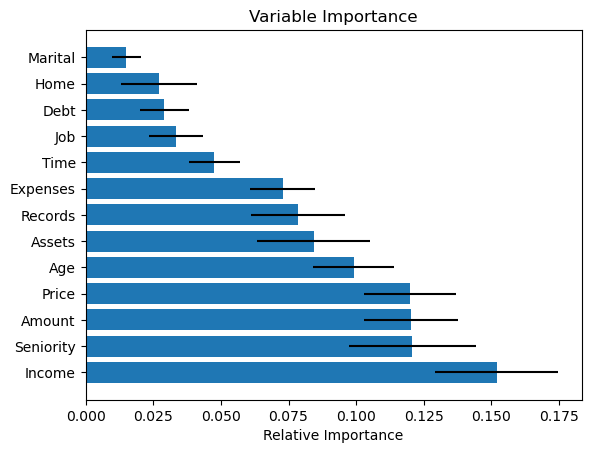

In [35]:
padding = np.arange(X_train_stand.size/len(X_train_stand)) + 0.5

plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [36]:
scores=np.zeros(X_train_stand.shape[1]+1)
for f in np.arange(0, X_train_stand.shape[1]+1):
    X1_f = X_train_stand[:,sorted_idx[:f+1]] 
    X2_f = X_test_stand [:,sorted_idx[:f+1]] 
    KNN.fit(X1_f,y_train) 
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(y_test,YKNN),3)

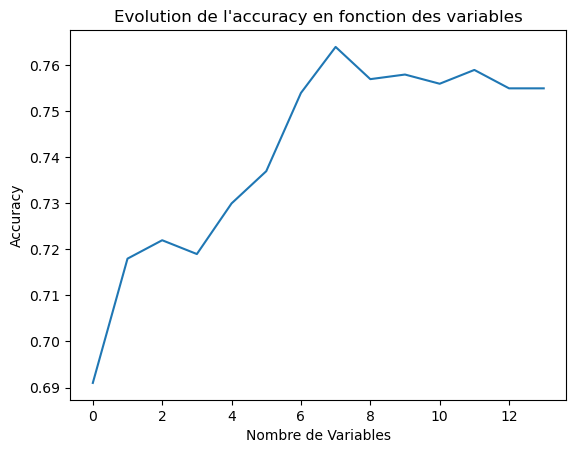

In [37]:
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables") 
plt.show()

In [38]:
print(f"On conserve {np.argmax(scores)} variables")

On conserve 7 variables


6. Paramétrage des classifieurs : Dans cette partie, vous allez utiliser la fonction GridSearchCV de scikit-learn afin de tuner les paramètres de votre meilleur algorithme. Vous allez choisir les meilleurs paramètres qui optimisent au mieux le critère suivant : (accuracy/précision)/2

In [39]:
from sklearn.metrics import make_scorer

def scorer(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    return (acc/prec)/2
    

score = make_scorer(scorer)

In [40]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

paramètres = {'n_neighbors' : [2, 4, 5, 7, 9, 11, 17, 18, 25, 35, 60],
              'weights' : ('uniform', 'distance'),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'p': [1, 2, 3, 4]}

clf = GridSearchCV(estimator = knn, param_grid = paramètres, scoring = score, cv = 3)

clf.fit(X_train_stand, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [2, 4, 5, 7, 9, 11, 17, 18, 25, 35, 60],
                         'p': [1, 2, 3, 4],
                         'weights': ('uniform', 'distance')},
             scoring=make_scorer(scorer))

In [41]:
y_pred = clf.predict(X_test_stand)

accu = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

print(f"précision : {np.round(prec, 2)}\naccurracy : {np.round(accu, 2)}")

précision : 0.8
accurracy : 0.77


In [45]:
print(f"Notre meilleur algorithme est donné par les paramètres suiants {clf.best_params_}")

Notre meilleur algorithme est donné par les paramètres suiants {'algorithm': 'auto', 'n_neighbors': 60, 'p': 1, 'weights': 'uniform'}


7. Création d’un pipeline : Dans cette partie vous allez automatiser l’enchainement des traitements effectués précédemment (Normalisation ou non, ACP ou non et Construction du classifieur) dans un pipeline (module pipeline.Pipeline de Scikit-learn).Sauvegarder ensuite votre pipeline dans un pickle afin de pouvoir l’utiliser dans une phase de scoring (Donner le code permettant son utilisation).

In [46]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('ss', StandardScaler()), 
                 ('knn', KNeighborsClassifier(n_neighbors=60, algorithm='auto', p=1, weights='uniform'))])

In [47]:
import pickle

with open('pipeline.pickle', 'wb') as f:
    pickle.dump(pipe, f)

with open('pipeline.pickle', 'rb') as f:
    pipe2 = pickle.load(f)

In [54]:
clf2 = pipe2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

accf = accuracy_score(y_test, y_pred)
precf = precision_score(y_test, y_pred)

print(f"Accuraccy : {np.round(accf, 2)} \nPrécision : {np.round(precf, 2)}")

Accuraccy : 0.78 
Précision : 0.8


### Jusqu’à là, vous avez comparé que 3 algorithmes de classification afin de mettre le meilleur d’entre eux en production. Cette comparaison a été faite sur une seule base de test. Ce qui est malheureusement pas suffisant. Dans la suite, vous allez voir comment comparer automatiquement et pertinemment plusieurs classifieurs.


In [68]:
import xgboost
import time

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

### Comparaison de plusieurs modèles par cross validation 

In [64]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [66]:
clfs = {
    'RF1': RandomForestClassifier(n_estimators=200, random_state=1),
    'RF2' :  RandomForestClassifier(n_estimators=300, random_state=42),
    'KNN1': KNeighborsClassifier(n_neighbors=10),
    'KNN2' : KNeighborsClassifier(n_neighbors=60, p=1),
    'MLP' : MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1),
    'MLP1' : MLPClassifier(hidden_layer_sizes=(40, 20), random_state=42),
    'MLP2' : MLPClassifier(hidden_layer_sizes=(80, 40), random_state=1),
    'Bagging' : BaggingClassifier(n_estimators=200, random_state=1),
    'Bagging1' : BaggingClassifier(n_estimators=400, random_state=42),
    'ABoost' : AdaBoostClassifier(n_estimators=200, random_state=42),
    'xgboost' : XGBClassifier(n_estimators = 200, random_state = 42)
}

In [71]:
def run_classifiers(clfs, X, y):
    for i in clfs:
        clf = clfs[i]
        start_time = time.time()
        cv_acc = cross_val_score(clf, X, y, cv=kf)
        duration = time.time() - start_time
        cv_auc = cross_val_score(clf, X, y, cv = kf, scoring='roc_auc')
        cv_prec = cross_val_score(clf, X, y, cv = kf, scoring = 'precision')
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_auc), np.std(cv_auc)))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_prec), np.std(cv_prec)))
        print("duration for {0} is: {1:.3f}".format(i, duration))
        print('********************************')

In [72]:
run_classifiers(clfs, X_train, y_train)

Accuracy for RF1 is: 0.784 +/- 0.022
AUC for RF1 is: 0.824 +/- 0.032
Precision for RF1 is: 0.812 +/- 0.021
duration for RF1 is: 6.767
********************************
Accuracy for RF2 is: 0.785 +/- 0.023
AUC for RF2 is: 0.821 +/- 0.032
Precision for RF2 is: 0.812 +/- 0.024
duration for RF2 is: 10.172
********************************
Accuracy for KNN1 is: 0.715 +/- 0.021
AUC for KNN1 is: 0.659 +/- 0.019
Precision for KNN1 is: 0.767 +/- 0.022
duration for KNN1 is: 0.153
********************************
Accuracy for KNN2 is: 0.739 +/- 0.025
AUC for KNN2 is: 0.699 +/- 0.042
Precision for KNN2 is: 0.761 +/- 0.023
duration for KNN2 is: 0.193
********************************
Accuracy for MLP is: 0.670 +/- 0.072
AUC for MLP is: 0.677 +/- 0.042
Precision for MLP is: 0.786 +/- 0.029
duration for MLP is: 2.817
********************************
Accuracy for MLP1 is: 0.706 +/- 0.065
AUC for MLP1 is: 0.700 +/- 0.059
Precision for MLP1 is: 0.804 +/- 0.040
duration for MLP1 is: 3.894
******************